### Useful references/ vignettes
https://stuartlab.org/signac/articles/pbmc_vignette.html

https://stuartlab.org/signac/articles/pbmc_multiomic.html 

https://stuartlab.org/signac/articles/motif_vignette

In [2]:
.libPaths(new = c("/home/paola.benaglio/conda_envs/renv_multiome/lib/R/library",
          "/group/soranzo/paola.benaglio/r_libraries"))

Sys.setenv(RETICULATE_PYTHON="/home/paola.benaglio/conda_envs/renv_multiome/bin/python")
library(reticulate)
reticulate::use_python("/home/paola.benaglio/conda_envs/renv_multiome/bin/python")
reticulate::use_condaenv("/home/paola.benaglio/conda_envs/renv_multiome")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg') 
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat)) 
suppressMessages(library(Signac)) 
suppressMessages(library(EnsDb.Hsapiens.v86)) 
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(chromVAR))
suppressMessages(library(enrichR))
suppressMessages(library(JASPAR2020))
suppressMessages(library(TFBSTools))
suppressMessages(library(motifmatchr))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
library(pheatmap)

[1] TRUE

Module(leidenalg)

In [3]:
#### Load here the final object
output_dir = "/group/soranzo/paola.benaglio/k562_multiome/processing_outputs/"
#adata = readRDS(file = file.path(output_dir,'merged_filtered_atacPeaks.rds'))

In [1]:
adata

ERROR: Error in eval(expr, envir, enclos): object 'adata' not found


### Perform pairwise comparisons (wilcoxon test) with WT genotype for each timepoint


In [4]:
adata$new_categ = paste( adata$orig.ident, adata$Assigned_GFPgenotype, sep=".")

DefaultAssay(adata) <- 'SCT'  ### normalized rna
Idents(adata) <- "new_categ"

In [5]:
DIFFTAB = data.frame()
for (timep in unique(adata$orig.ident)){
for (geno in c('16bp_del','80bp_del','HET','MUT')){
    
    test1 = paste( timep, geno, sep=".")
    wt    = paste( timep, "WT", sep=".")
de_mut <- FindMarkers(adata, ident.1 = test1, ident.2 = wt , verbose = FALSE)
de_mut$comparison = paste0(test1, "Vs", wt) 
de_mut$gene_name = rownames(de_mut)    
DIFFTAB = rbind(DIFFTAB, de_mut)  
    }
    }

In [12]:
subset(DIFFTAB , gene_name=="CUX1")

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
CUX1  3.629863e-03 -0.1186060 0.995 0.994 1.000000e+00
CUX11 2.345305e-03 -0.1171155 0.996 0.994 1.000000e+00
CUX12 6.820508e-17 -0.5018603 0.996 0.994 1.986336e-12
CUX13 1.605719e-19 -0.4032163 0.977 0.997 4.676336e-15
CUX14 5.866989e-11 -0.3690427 0.987 0.999 1.708643e-06
CUX15 4.558360e-18 -0.4455905 0.990 0.995 1.327531e-13
      comparison                     gene_name
CUX1  MCO_1278.16bp_delVsMCO_1278.WT CUX1     
CUX11 MCO_1278.80bp_delVsMCO_1278.WT CUX1     
CUX12 MCO_1278.MUTVsMCO_1278.WT      CUX1     
CUX13 MCO_1279.MUTVsMCO_1279.WT      CUX1     
CUX14 MCO_1280.MUTVsMCO_1280.WT      CUX1     
CUX15 MCO_1281.MUTVsMCO_1281.WT      CUX1

In [7]:
## only subset for protein coding genes
gns <- genes(EnsDb.Hsapiens.v86)
gns2 <- gns[gns$gene_biotype %in% "protein_coding"]
DIFFTAB = subset(DIFFTAB, gene_name %in% gns2$gene_name)

In [8]:
feats = subset(DIFFTAB, comparison == 'MCO_1278.MUTVsMCO_1278.WT')[1:10,"gene_name"]

In [9]:
### PLot a few topgenes in one condition
options(repr.plot.width = 15, repr.plot.height = 20)
VlnPlot(adata,group.by = "orig.ident",features = feats,  split.by = "Assigned_GFPgenotype", ncol=2)

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



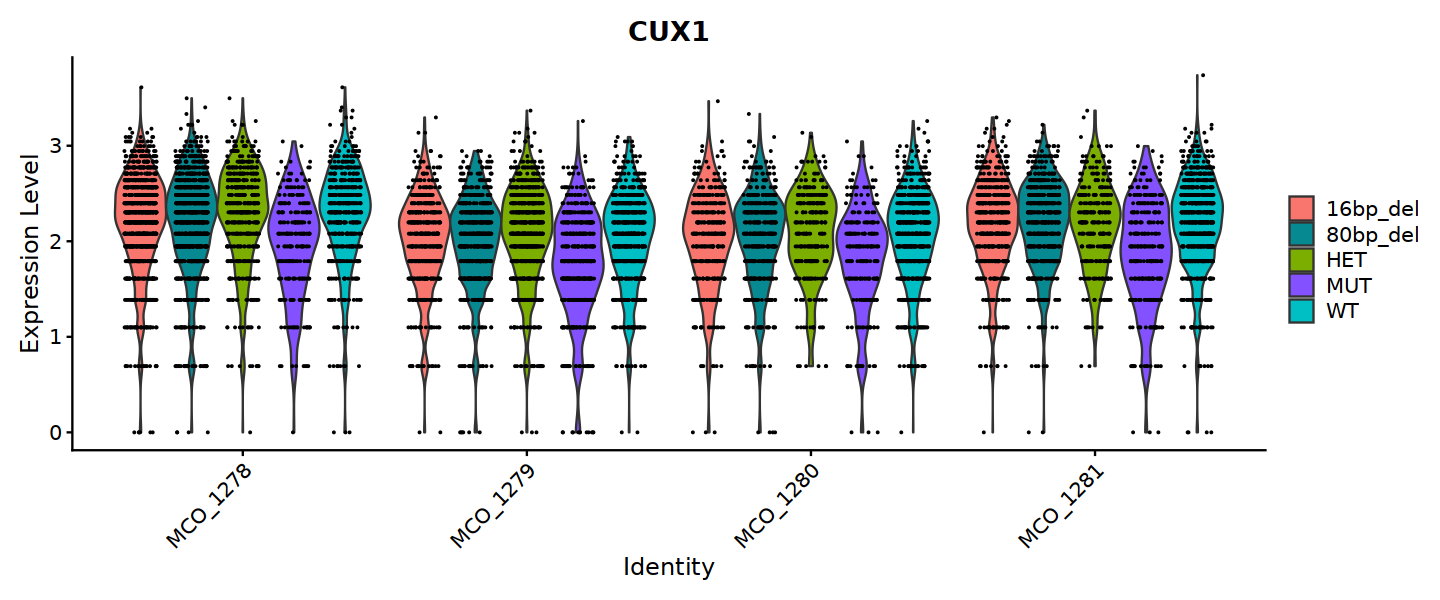

In [10]:
options(repr.plot.width = 12, repr.plot.height = 5)
VlnPlot(adata,group.by = "orig.ident",features = "CUX1",  split.by = "Assigned_GFPgenotype") 

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



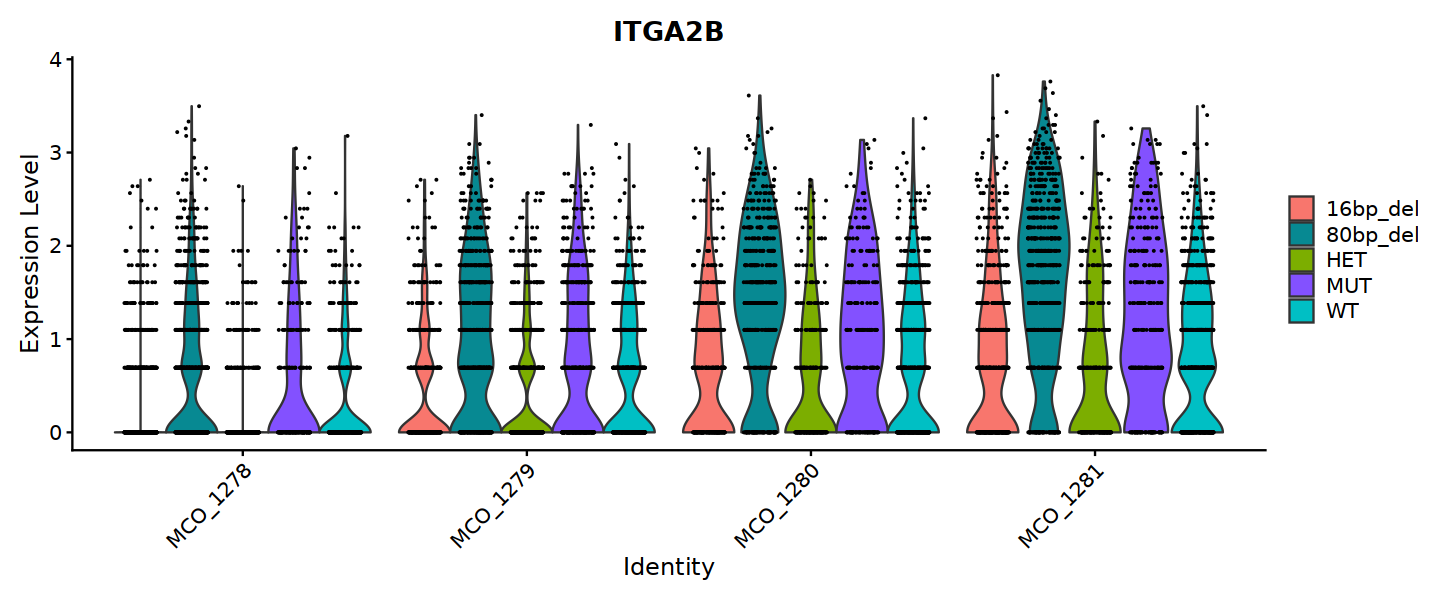

In [104]:
options(repr.plot.width = 12, repr.plot.height = 5)
VlnPlot(adata,group.by = "orig.ident",features = "ITGA2B",  split.by = "Assigned_GFPgenotype") 

In [32]:
DefaultAssay(adata) <- 'SCT' 
options(repr.plot.width = 12, repr.plot.height = 5)
VlnPlot(adata,group.by = "orig.ident",features = c('ITGA2B', 'FYB1' , 'GYPA')  ) 

In [37]:
VlnPlot(adata,group.by = "seurat_clusters",features = c('ITGA2B', 'FYB1' , 'GYPA') )


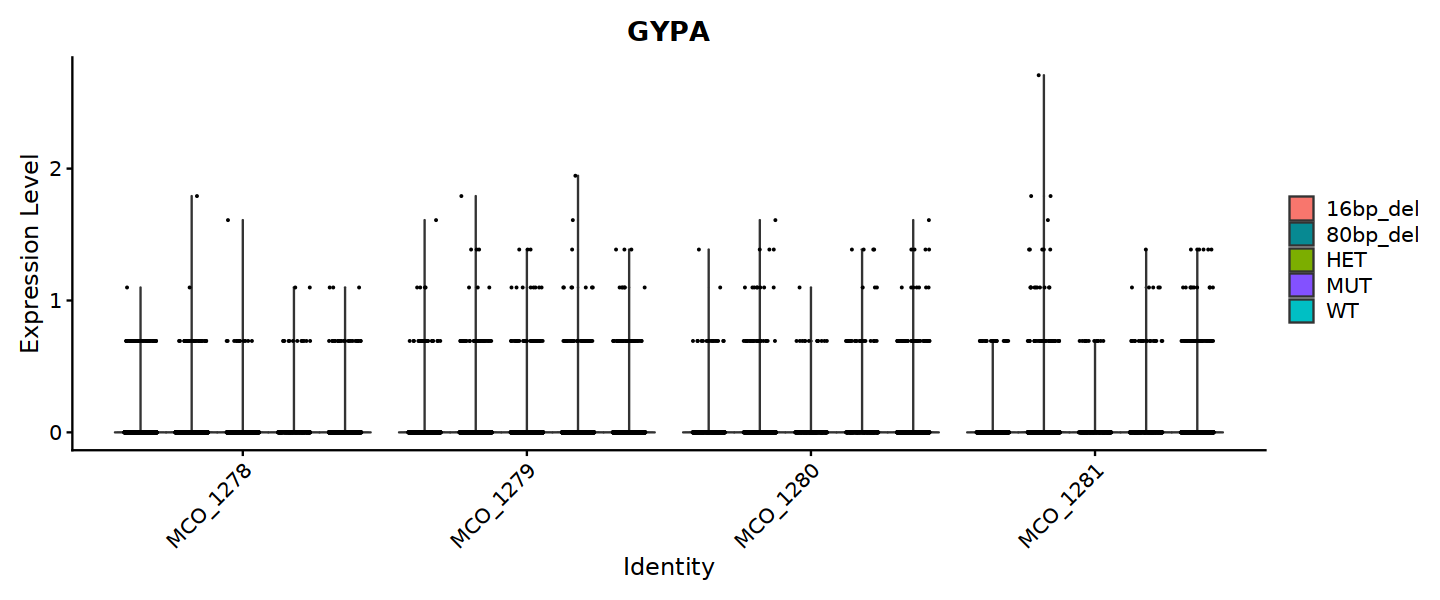

In [6]:
DefaultAssay(adata) <- 'SCT'
options(repr.plot.width = 12, repr.plot.height = 5)
VlnPlot(adata,group.by = "orig.ident",features = "GYPA",  split.by = "Assigned_GFPgenotype") 

In [38]:
FeaturePlot(adata, features = c('ITGA2B', 'FYB1' , 'GYPA'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

In [13]:
write.table(DIFFTAB, file=file.path(output_dir,'Differential_genes_vsWT.txt'), sep='\t', quote=FALSE, row.names=F)

### Plot proportion groups
#### are clusters meaningful? are they enriched for specific timepoints/ genotypes?

In [29]:
tab = table(adata$Assigned_GFPgenotype, adata$orig.ident)

In [30]:
tab

          
           MCO_1278 MCO_1279 MCO_1280 MCO_1281
  16bp_del     1101      505      374      595
  80bp_del     1043      649      482      634
  HET           520      774      288      296
  MUT           243      532      239      312
  WT            525      666      680      792

In [7]:
colnames (tab) = c("24h", "48h", "72h", "96h")

In [8]:
p1<- ggplot(data=data.frame(tab), aes(x=Var2, y=Freq, fill=Var1) )+ 
geom_bar(stat="identity", color="black")


In [9]:
pct = t(tab)/colSums(tab)

In [10]:
p2<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")


In [11]:
pct = tab/rowSums(tab)
p3<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")


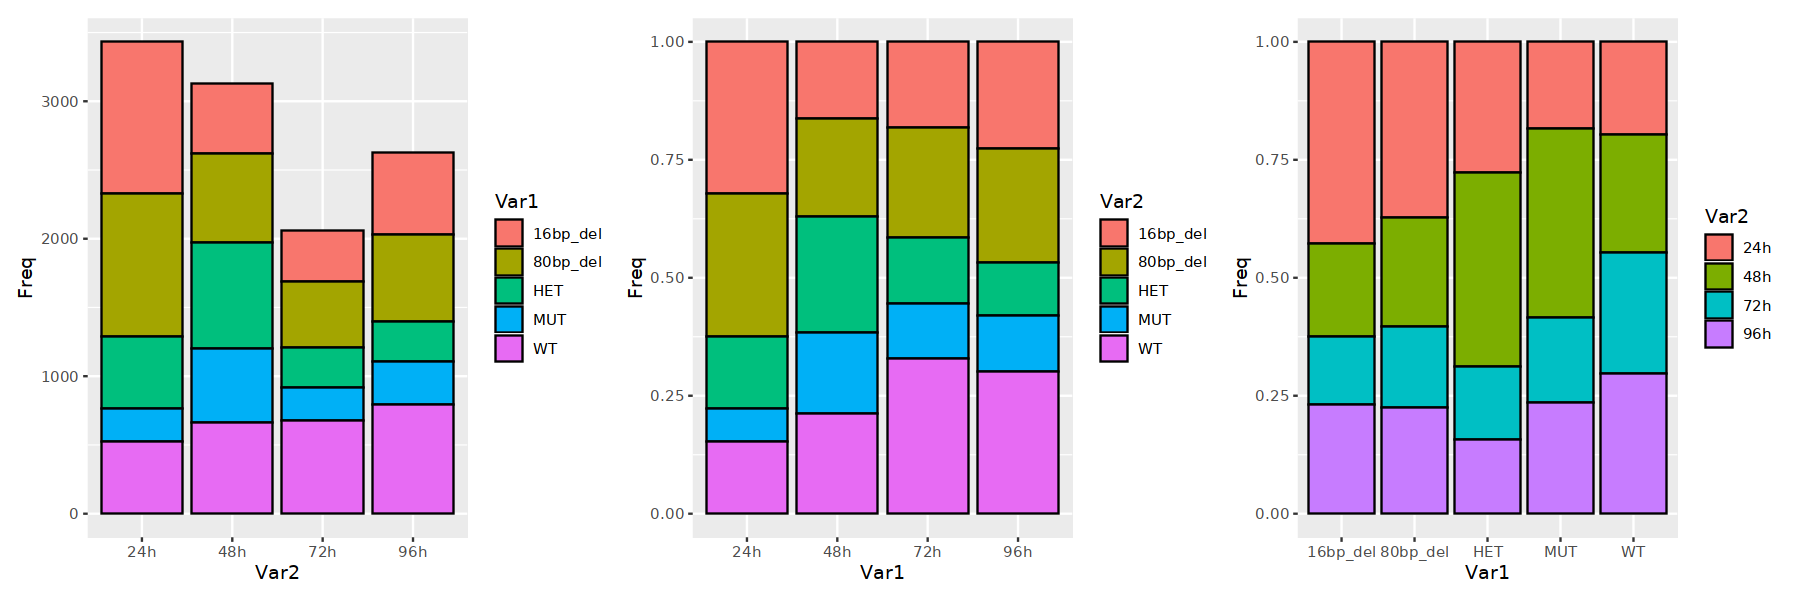

In [15]:
options(repr.plot.width=15, repr.plot.height=5)
p1+p2+p3

In [39]:
tos = table(adata$Assigned_GFPgenotype) ## full dataset 
tab = table(adata$orig.ident, adata$Assigned_GFPgenotype)
rownames (tab) = c("24h", "48h", "72h", "96h")
normcells =t((t(tab) / c(tos))*10000)
pct = normcells/rowSums(normcells)
p4<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")


In [40]:
normcells

     
      16bp_del 80bp_del      HET      MUT       WT
  24h 4275.728 3714.387 2768.903 1832.579 1971.461
  48h 1961.165 2311.254 4121.406 4012.066 2500.939
  72h 1452.427 1716.524 1533.546 1802.413 2553.511
  96h 2310.680 2257.835 1576.145 2352.941 2974.089

In [41]:
tos = table(adata$orig.ident) ## full dataset 
tab = table(adata$Assigned_GFPgenotype, adata$orig.ident)
colnames (tab) = c("24h", "48h", "72h", "96h")
normcells =t((t(tab) / c(tos))*10000)
pct = normcells/rowSums(normcells)
p5<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")


In [42]:
normcells

          
                24h      48h      72h      96h
  16bp_del 3208.042 1615.483 1812.894 2263.218
  80bp_del 3039.044 2076.136 2336.403 2411.563
  HET      1515.152 2476.008 1396.025 1125.903
  MUT       708.042 1701.855 1158.507 1186.763
  WT       1529.720 2130.518 3296.171 3012.552

In [43]:
p4+p5

In [47]:
tos = table(adata$orig.ident) ## full dataset 
tab = table(adata$seurat_clusters, adata$orig.ident)
normcells =t((t(tab) / c(tos))*10000)
df = data.frame(normcells)
#p3<-ggplot(df, aes(x=Var1, y=Freq, fill=Var2))+  geom_boxplot() + facet_wrap(~Var1, scale="free", ncol=5 )
pct = normcells/rowSums(normcells)
colnames (pct) = c("24h", "48h", "72h", "96h")
p6<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")

#p3 +p4

In [48]:
tab

    
     MCO_1278 MCO_1279 MCO_1280 MCO_1281
  1       631      906      564      710
  2       790      363      228      356
  3       291      449      395      449
  4       417      485      298      352
  5       644      275       80       53
  6       125      196      172      271
  7       196      132       64       81
  8        42       81       80      102
  9         8       59       79      115
  10      147       51       25       38
  11       69       49       55       68
  12       41       55       14       11
  13       31       25        9       23

In [49]:
tos = table(adata$Assigned_GFPgenotype) ## full dataset 
tab = table(adata$seurat_clusters, adata$Assigned_GFPgenotype)
normcells =t((t(tab) / c(tos))*10000)
df = data.frame(normcells)
options(repr.plot.width=15, repr.plot.height=5)
#p3<-ggplot(df, aes(x=Var1, y=Freq, fill=Var2))+  geom_boxplot() + facet_wrap(~Var1, scale="free", ncol=5 )
pct = normcells/rowSums(normcells)

p7<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")


In [50]:
tab

    
     16bp_del 80bp_del  HET  MUT   WT
  1       172      915  494  396  834
  2      1403      112   99   53   70
  3       111      508  132  379  454
  4       163      231  578  125  455
  5        89      397  195  113  258
  6       231      279  103   52   99
  7        92      130   79   49  123
  8        17       67   50   17  154
  9        37       44   50   24  106
  10       96       54   50   20   41
  11      120       33   28   19   41
  12       17       18    5   72    9
  13       27       20   15    7   19

In [51]:
p6+p7

In [8]:
tos = table(adata$Assigned_GFPgenotype) ## full dataset 
tab = table(adata$orig.ident, adata$Assigned_GFPgenotype)
normcells =t((t(tab) / c(tos))*10000)
df = data.frame(normcells)
options(repr.plot.width=15, repr.plot.height=5)
p3<-ggplot(df, aes(x=Var1, y=Freq, fill=Var2))+  geom_boxplot() + facet_wrap(~Var1, scale="free", ncol=5 )
pct = normcells/rowSums(normcells)

p4<- ggplot(data=data.frame(pct), aes(x=Var1, y=Freq, fill=Var2) )+ 
geom_bar(stat="identity", color="black")

p3 +p4

In [58]:
DF = data.frame(GT= adata$Assigned_GFPgenotype, cluster = adata$seurat_clusters,
                timepoint = adata$orig.ident
                )

In [61]:
tb = data.frame(table(DF))

In [67]:
p8<- ggplot(data=tb, aes(x=cluster, y=Freq, fill=GT) )+ 
geom_bar(stat="identity", color="black", position="fill")+ facet_wrap(~timepoint)


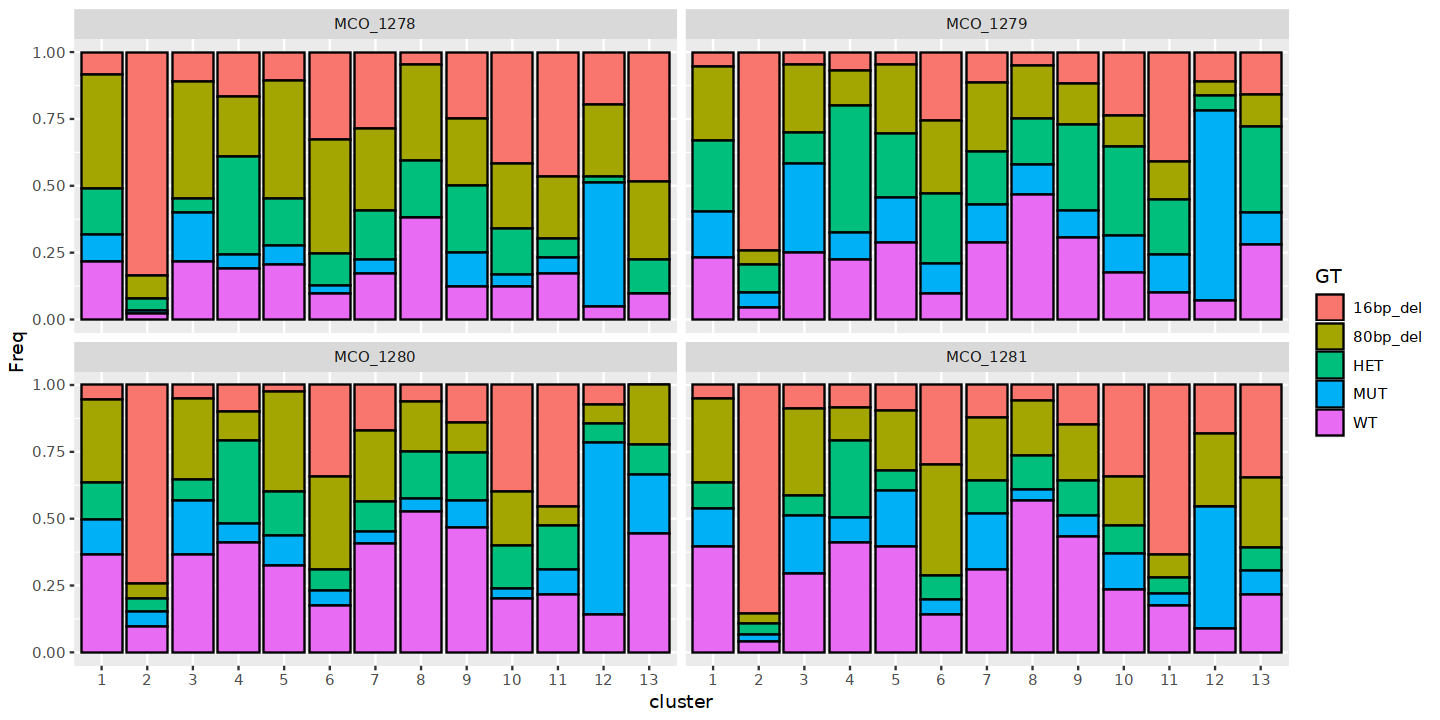

In [69]:
options(repr.plot.width=12, repr.plot.height=6)
p8

In [72]:

p9<- ggplot(data=tb, aes(x=timepoint, y=Freq, fill=GT) )+ 
geom_bar(stat="identity", color="black", position="fill")+ facet_wrap(~cluster)


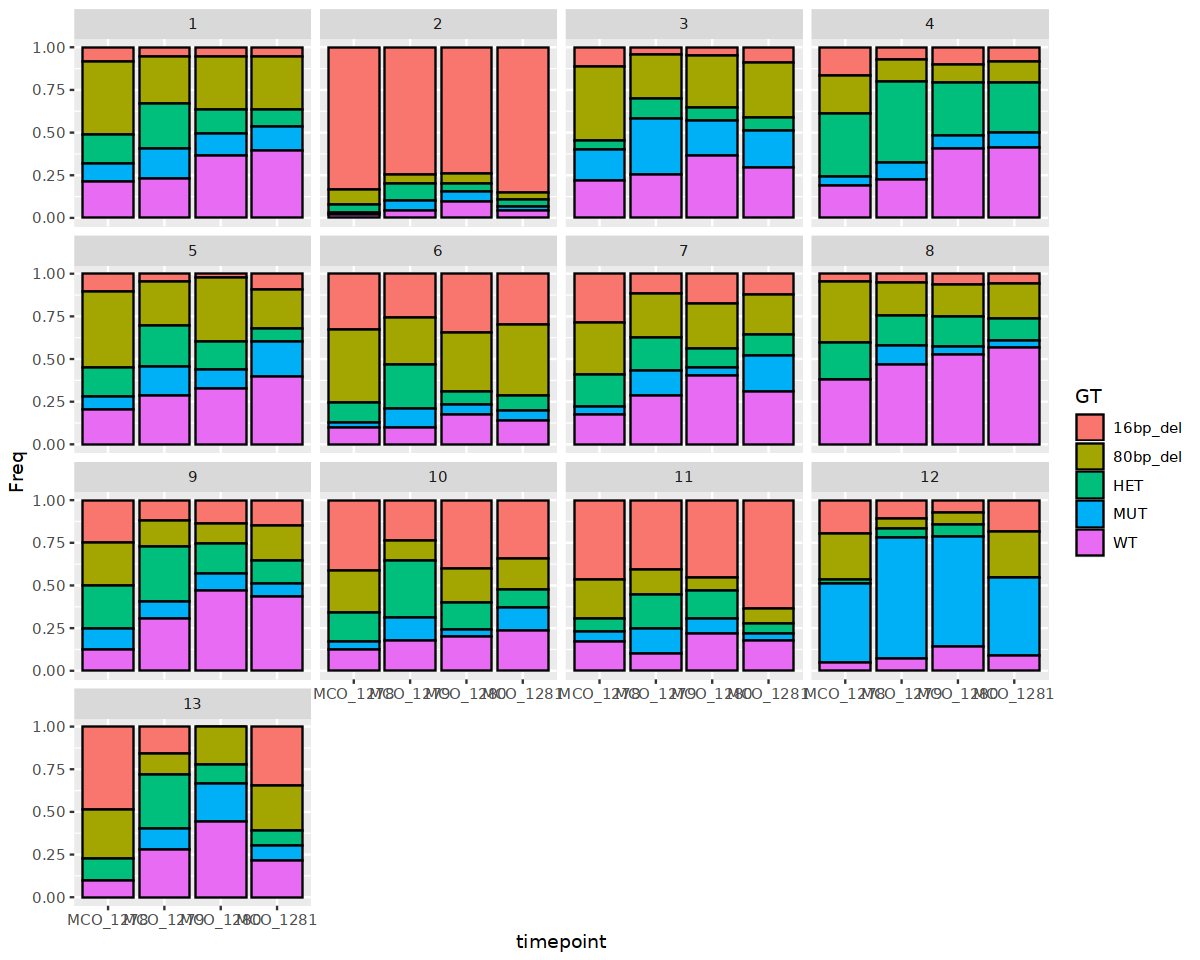

In [74]:
options(repr.plot.width=10, repr.plot.height=8)
p9

In [75]:
write.csv(tb, "table_cell_counts.csv")

### find markers of clusters

In [27]:

Idents(adata) <- "seurat_clusters"

In [28]:
pos.marker <- FindAllMarkers(object = adata, assay="SCT",only.pos = TRUE)

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [29]:
pos.coding = subset(pos.marker, gene %in% gns2$gene_name)
sp = split(pos.coding, pos.coding$cluster)
gene_list = sapply(sp, function(x) x[1:4,'gene'])

In [30]:
gl = unique(c(gene_list))

In [31]:
p1 <- DotPlot(adata, assay='SCT', group.by='seurat_clusters', features=gl, cluster.idents=TRUE) 
p1 <- p1 + theme(axis.text.x=element_text(angle=45, hjust=1)) + xlab('') + ylab('')+ NoLegend()


In [98]:
p2 = DimPlot(object = adata, reduction ='umap.wnn' ,label = TRUE,group.by = "seurat_clusters") 

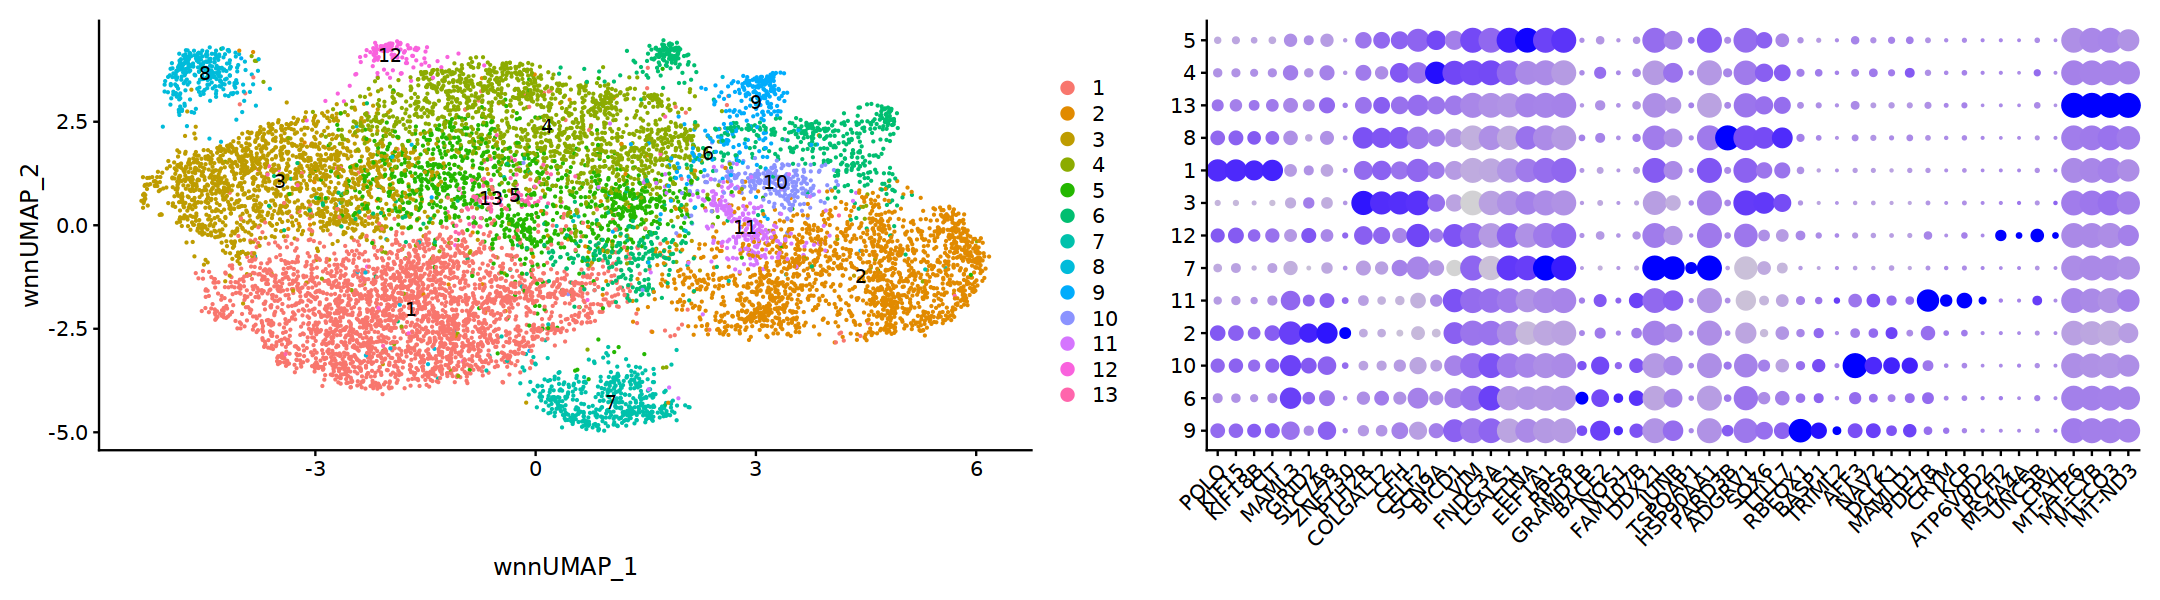

In [33]:
options(repr.plot.width = 18, repr.plot.height = 5)
p2+p1

In [109]:
p2 = DimPlot(object = adata, reduction ='umap.atac' ,label = TRUE,group.by = "seurat_clusters") 
p3 = DimPlot(object = adata, reduction ='umap.atac' ,label = FALSE,group.by = "orig.ident") 
p4 = DimPlot(object = adata, reduction ='umap.atac' ,label = FALSE,group.by = "Assigned_GFPgenotype") 

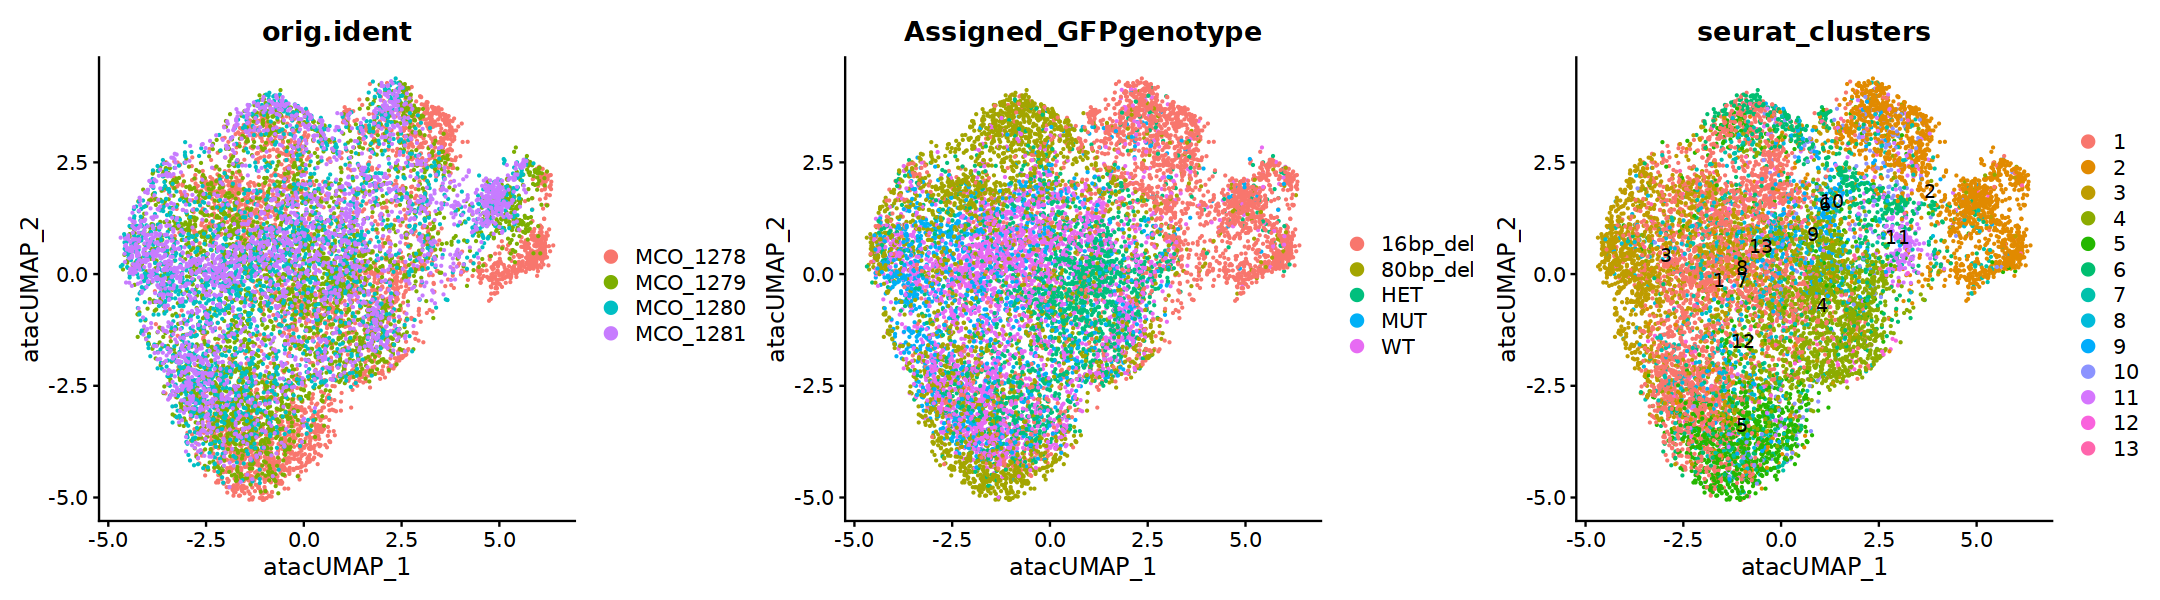

In [110]:
options(repr.plot.width = 18, repr.plot.height = 5)
p3+p4+p2

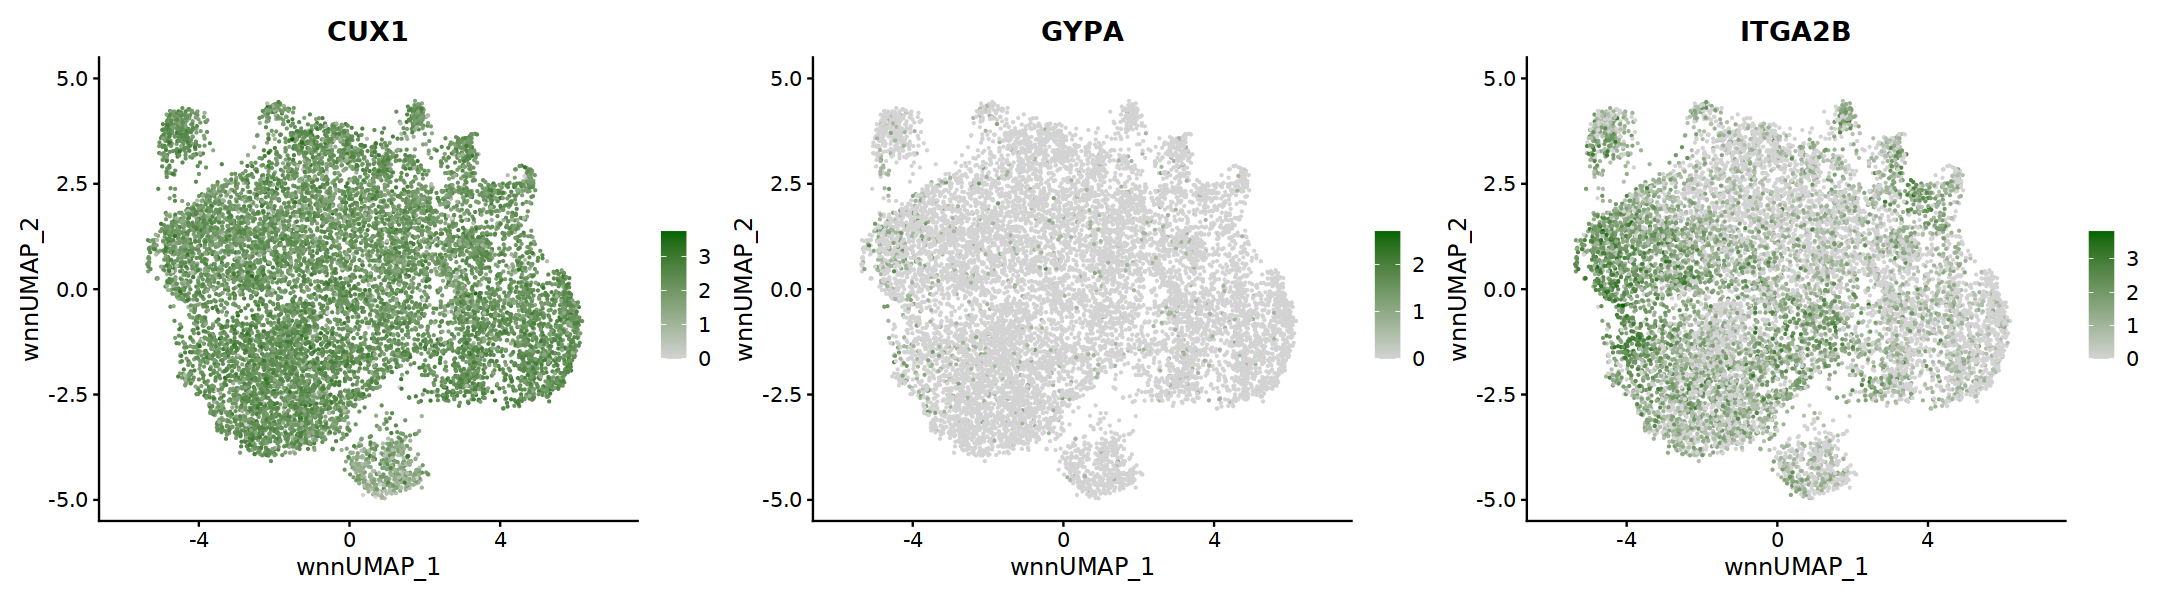

In [103]:
DefaultAssay(adata)<-"SCT"
FeaturePlot(adata, features = c("CUX1",'GYPA', 'ITGA2B'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

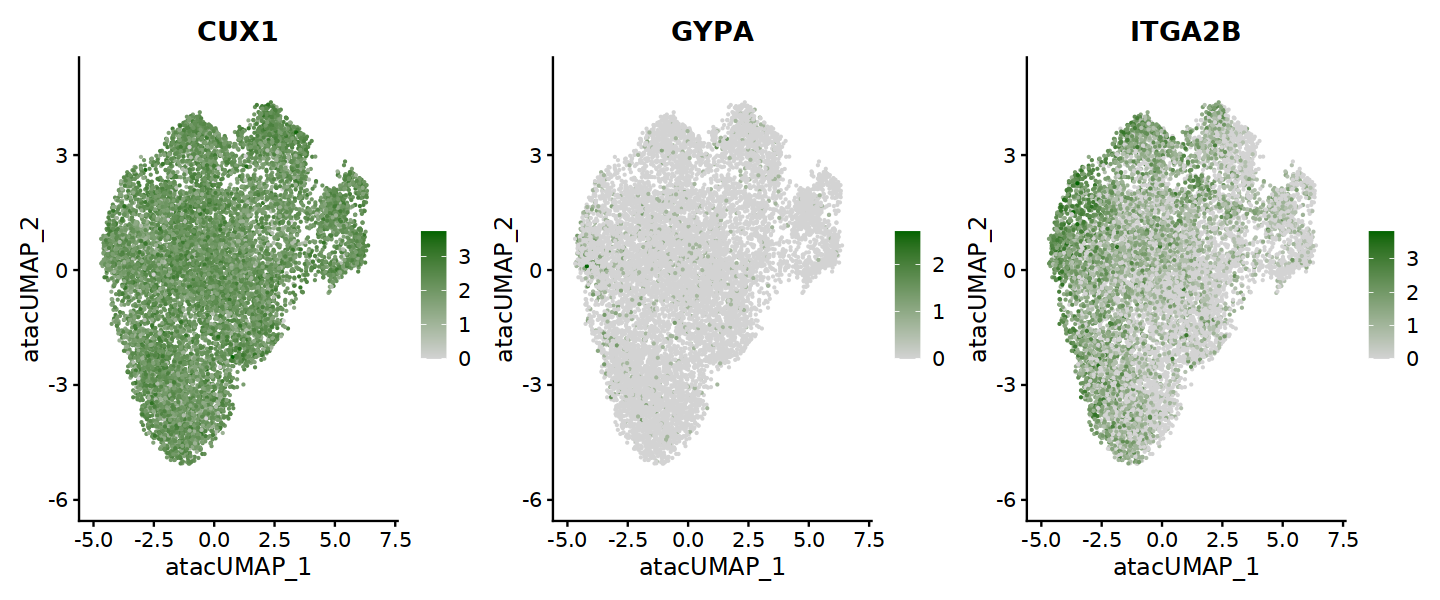

In [105]:
FeaturePlot(adata, features = c("CUX1",'GYPA', 'ITGA2B'),
                  reduction = 'umap.atac', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

In [106]:
FeaturePlot(adata, features = c("CUX1",'GYPA', 'ITGA2B'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

In [35]:
write.table(pos.marker, file=file.path(output_dir,'Cluster_marker_genes.txt'), sep='\t', quote=FALSE, row.names=F)

### GO enrichment analysis - enrichR packahe

In [18]:

dbs <- listEnrichrDbs()
dbs_sel =  "GO_Biological_Process_2021"

In [19]:
geneLists = list()
for (cl in 1:length(sp)){
   sub = subset( sp[[cl]], p_val_adj<0.05 & avg_log2FC>0.5)
    geneLists[[cl]]<- sub$gene
}

In [20]:
sapply(geneLists, length)

[1] 1118  977  825  586  252  653 2480   84  472  445 1145   81  150

In [21]:
enriched = lapply(geneLists, function(x) enrichr(c(x), dbs_sel))

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [22]:
cnm = gsub('GO_Biological_Process_2021.', '', colnames(as.data.frame(enriched[[1]])[1:20,]))
plotlist = list()
for(ct in 1:length(enriched)){
df =  as.data.frame(enriched[ct])[1:20,]
colnames(df) = cnm
plotlist[[ct]] <- plotEnrich(df, showTerms = 10, numChar = 50, y = "Odds.Ratio",xlab = '', title = paste ("cluster" , ct),
               orderBy = "P.value")+ scale_fill_gradient(  low = "darkblue", high = "gray")+ theme(legend.key.size = unit(1.5, 'cm'), #change legend key size
        legend.key.height = unit(0.5, 'cm'), #change legend key height
        legend.key.width = unit(0.3, 'cm'), #change legend key width
        legend.title = element_text(size=15), #change legend title font size
        legend.text = element_text(size=8))
    
    }

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale

In [23]:
options(repr.plot.width=15, repr.plot.height=6)
gridExtra::grid.arrange( plotlist[[1]],plotlist[[2]],plotlist[[3]],plotlist[[4]],
                        ncol=2)



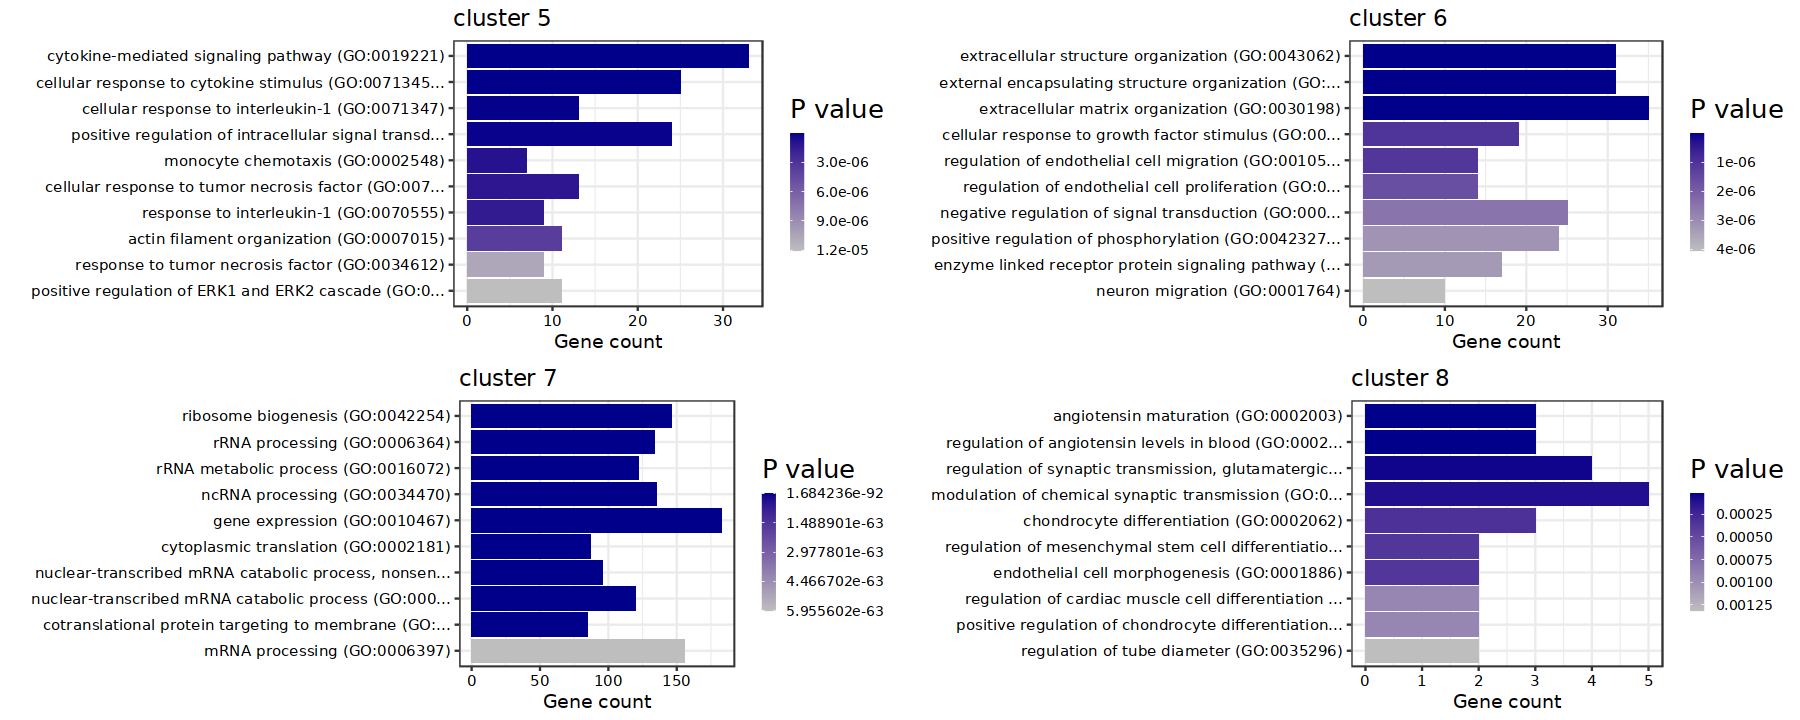

In [24]:
options(repr.plot.width=15, repr.plot.height=6)
gridExtra::grid.arrange( plotlist[[5]],plotlist[[6]],plotlist[[7]],plotlist[[8]],
                        ncol=2)

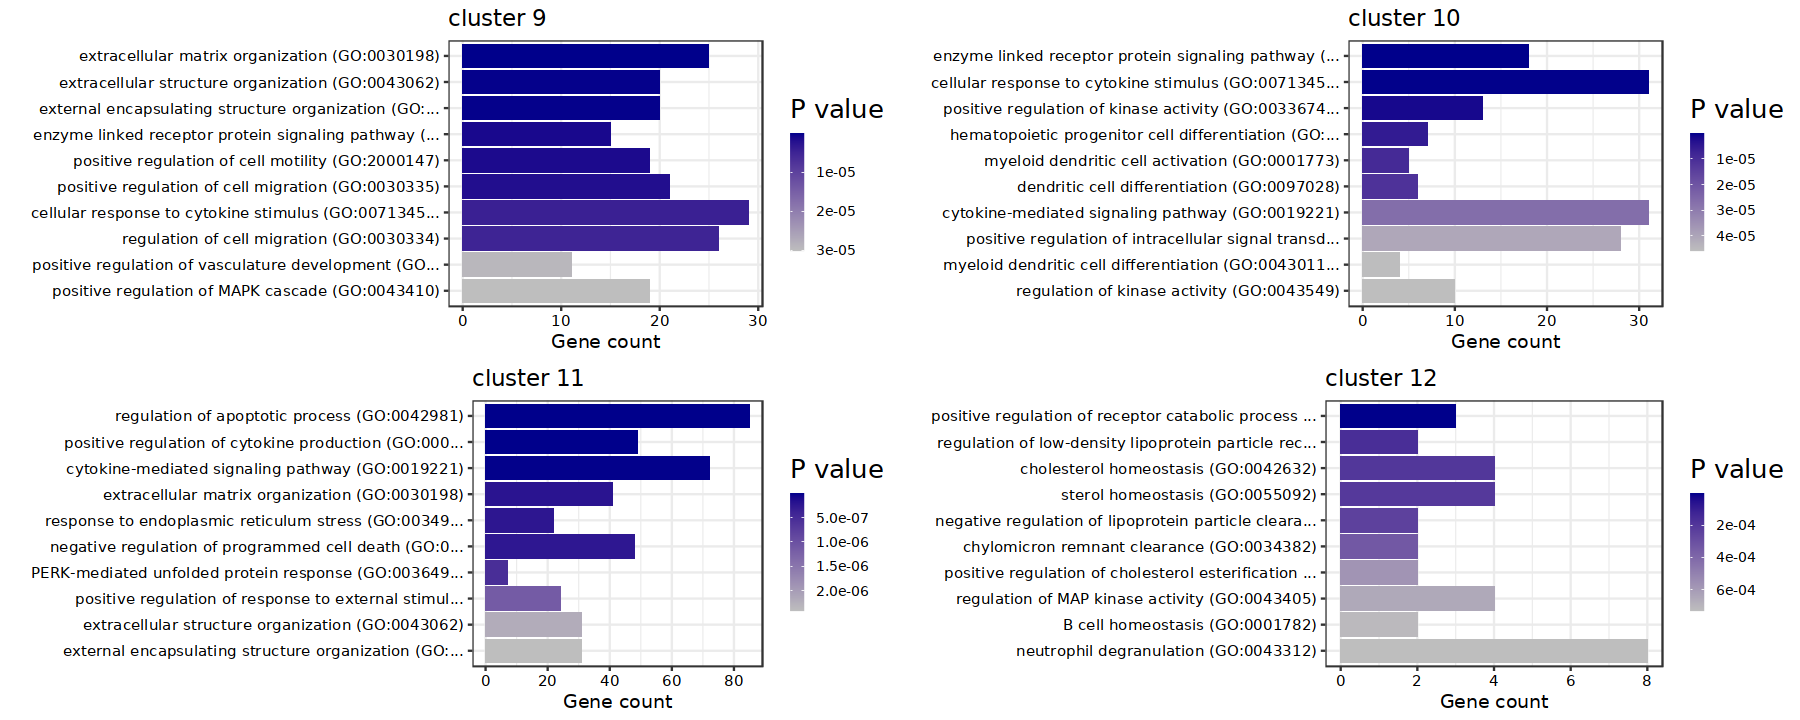

In [25]:
options(repr.plot.width=15, repr.plot.height=6)
gridExtra::grid.arrange( plotlist[[9]],plotlist[[10]],plotlist[[11]],plotlist[[12]],
                        ncol=2)

### Linking Peaks to genes

In [36]:
selected_genes = read.table(
    '/group/soranzo/manuel.tardaguila/Bulk_RNA_seq/Annotation_MSigdB/Pathway_CUX1_TARGET_GENES.tsv', header=T)

In [59]:
'CUX1' %in% selected_genes$Symbol

[1] TRUE

In [43]:
DefaultAssay(adata) <- "ATAC"

# first compute the GC content for each peak
adata <- RegionStats(adata, genome = BSgenome.Hsapiens.UCSC.hg38)

# link peaks to genes
adata <- LinkPeaks(
  object = adata,
  peak.assay = "ATAC",
  expression.assay = "SCT",
  genes.use = selected_genes$Symbol
)

Testing 731 genes and 356771 peaks

Found gene coordinates for 690 genes

'as(<dgCMatrix>, "dgTMatrix")' is deprecated.
Use 'as(., "TsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [55]:
links = Links(adata)

In [58]:
length(unique(links$gene))

[1] 286

In [64]:
head(links)

GRanges object with 6 ranges and 5 metadata columns:
      seqnames            ranges strand |     score        gene
         <Rle>         <IRanges>  <Rle> | <numeric> <character>
  [1]     chr1 13524016-13700198      * | 0.0520604       PRDM2
  [2]     chr1 13700198-13749288      * | 0.0573588       PRDM2
  [3]     chr1 13700198-13809255      * | 0.0670804       PRDM2
  [4]     chr1 21176888-21324531      * | 0.0608718      EIF4G3
  [5]     chr1 37554302-37808123      * | 0.0515410       SNIP1
  [6]     chr1 37554302-38012718      * | 0.0542409       SNIP1
                        peak    zscore      pvalue
                 <character> <numeric>   <numeric>
  [1] chr1-13523570-13524462   2.79768 2.57359e-03
  [2] chr1-13748464-13750112   2.68753 3.59911e-03
  [3] chr1-13808447-13810062   4.08608 2.19359e-05
  [4] chr1-21324048-21325013   4.45341 4.22578e-06
  [5] chr1-37807006-37809239   2.91644 1.77026e-03
  [6] chr1-38012090-38013346   4.08802 2.17534e-05
  -------
  seqinfo: 23 seq

In [62]:
Idents(adata) = 'Assigned_GFPgenotype'

p1 <- CoveragePlot(
  object = adata,
  region = "chr7-101810000-101900000", 
  features = "CUX1",
  expression.assay = "SCT",
  extend.upstream = 1000,
  extend.downstream = 10000
)

Warning message:
"Removed 340 rows containing missing values (`geom_segment()`)."


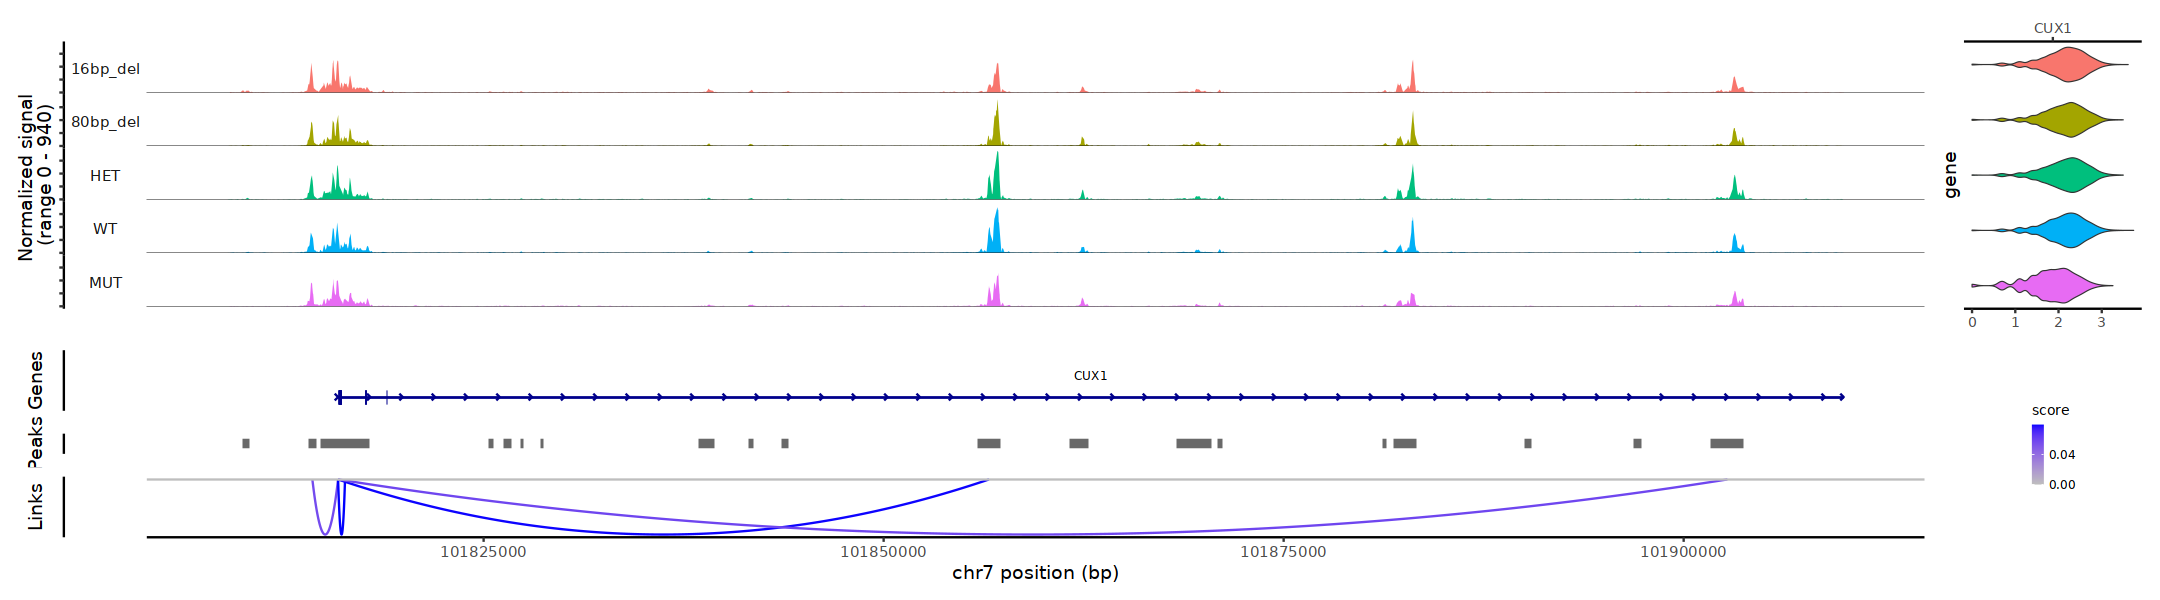

In [63]:
p1

In [65]:
lf = as.data.frame(links)

In [67]:
write.table(lf, file.path(output_dir,'Links_to_Cux1-TARGET_genes.txt'), sep='\t', quote=FALSE, row.names=F)

### Motifs and ChromVar analysis

In [25]:
library(BiocParallel)

Warning message:
"package 'BiocParallel' was built under R version 4.3.2"


In [26]:
 DefaultAssay(adata) <- 'ATAC'

In [27]:
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE))

In [28]:
motifdata = cbind(sapply(pfm, function(x) unlist(x@name)),sapply(pfm, function(x) unlist(x@matrixClass )))

In [29]:
names(pfm) <- motifdata[,1]

In [73]:
adata <- AddMotifs(
  object = adata, genome =BSgenome.Hsapiens.UCSC.hg38 , assay= "ATAC",
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



In [75]:
saveRDS(adata, file = file.path(output_dir,'merged_downstream_analysis.rds'))

### Differential Motifs analysis

In [4]:
adata = readRDS(file.path(output_dir,'merged_downstream_analysis.rds'))

In [4]:
adata

An object of class Seurat 
459097 features across 11250 samples within 4 assays 
Active assay: ATAC (356772 features, 356772 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [ ]:
#### find differentially accessible peaks between MUT and WT (all timepoints together)

In [13]:
Idents(adata)<- "Assigned_GFPgenotype"
da_peaks <- FindMarkers(
  object = adata,
  ident.1 = 'MUT',
  ident.2 = 'WT',
  only.pos = FALSE,
  test.use = 'LR',
  min.pct = 0.1,
  latent.vars = 'nCount_ATAC'
)

In [14]:
dim(da_peaks)

[1] 20396     5

In [68]:
min(da_peaks$p_val_adj)

[1] 1.847035e-26

In [16]:
summary(da_peaks$avg_log2FC)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.46141 -0.22435 -0.11440 -0.03889  0.16587  2.33367 

In [17]:
p1  <- ggplot(da_peaks, aes(x=avg_log2FC, y=-log(p_val))) + geom_point(aes( color= p_val_adj<0.05)) +  scale_color_manual(
    values=c("black","red" )) + NoLegend()


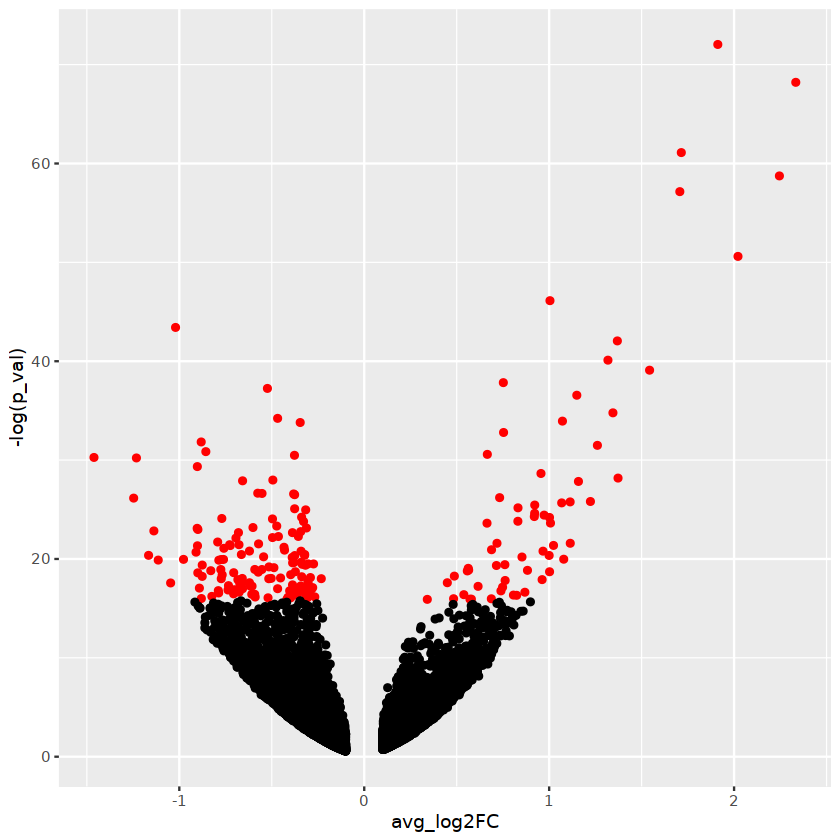

In [18]:
p1

In [49]:
top.da.peak_up <- rownames(da_peaks[da_peaks$p_val < 0.005 & da_peaks$avg_log2FC>0, ])
top.da.peak_down <- rownames(da_peaks[da_peaks$p_val < 0.005 & da_peaks$avg_log2FC<0, ])

In [70]:
bkg1 = rownames(da_peaks)[!(rownames(da_peaks) %in% top.da.peak_up)]
bkg2 = rownames(da_peaks)[!(rownames(da_peaks) %in% top.da.peak_down)]

In [71]:
# test enrichment
enriched.motifs_da_peaks_up <- FindMotifs(
  object = adata,
  features = top.da.peak_up,
    background = bkg1
)
enriched.motifs_da_peaks_down <- FindMotifs(
  object = adata,
  features = top.da.peak_down,
      background = bkg2
)

Testing motif enrichment in 1078 regions

Testing motif enrichment in 1886 regions



In [72]:
enriched.motifs_da_peaks_up["CUX1",]

motif observed background percent.observed percent.background
CUX1 CUX1  35       572        3.246753         2.960969          
     fold.enrichment pvalue    motif.name p.adjust 
CUX1 1.096517        0.3095963 CUX1       0.5745244

In [73]:
enriched.motifs_da_peaks_down["CUX1",]

motif observed background percent.observed percent.background
CUX1 CUX1  59       548        3.128314         2.960562          
     fold.enrichment pvalue    motif.name p.adjust 
CUX1 1.056662        0.3456632 CUX1       0.5474835

In [76]:

plotlist = list()
for (x in 1:2){
df = list(enriched.motifs_da_peaks_up,enriched.motifs_da_peaks_down)[[x]]

df$p_adj = df$p.adjust
df$logP = log(df$pvalue, 10)
df$logP[df$logP==-Inf]<- min(df$logP[df$logP!=-Inf])
df$fams = motifdata[ match(df$motif,   motifdata[,1]) ,2]

plotlist [[x]] <- ggplot(df, aes(x=fold.enrichment, y=-logP)) + geom_point(aes( color= p_adj<0.05)) +  scale_color_manual(
    values=c("black","red" ))+ geom_text(
    label=df$motif, 
    nudge_x = 0.1, nudge_y=0.2,
    check_overlap = T
     ) + NoLegend()
    }
#motiflist = MotifPlot(object = adata_new,motifs = df$motif[!duplicated(df$fams)][1:5] , ncol=5) + theme(axis.text.x = element_blank())


In [77]:
min(df$p_adj)

[1] 1.556572e-39

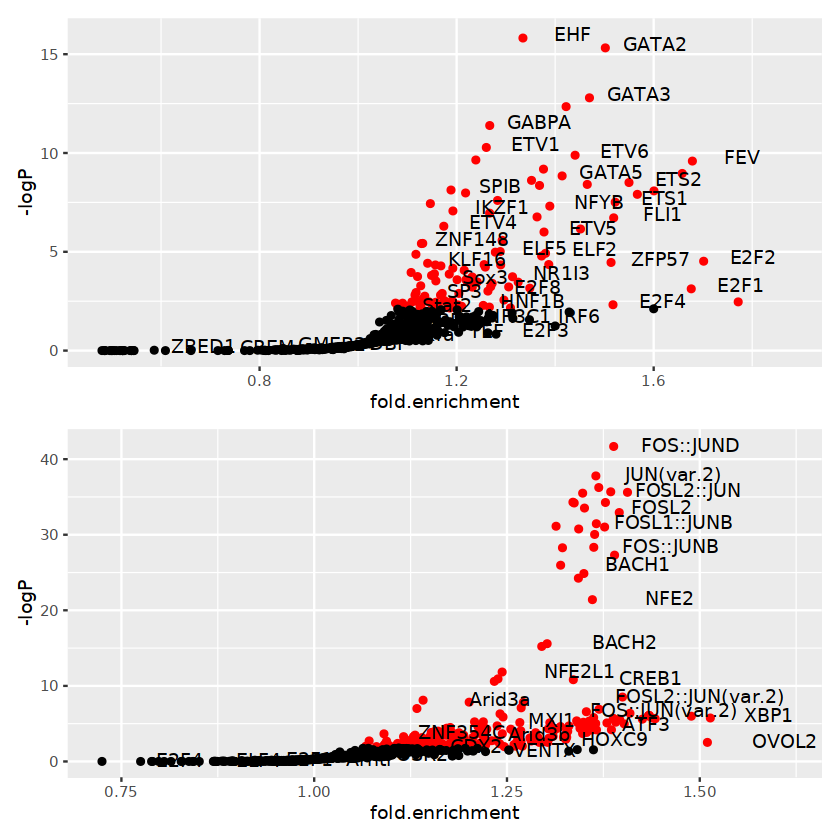

In [78]:
plotlist[[1]]/plotlist[[2]]

In [79]:
lf = read.table (file.path(output_dir,'Links_to_Cux1-TARGET_genes.txt'), header=T)

In [80]:
head(da_peaks)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
chr5-29089280-29090182    5.177073e-32 1.912048   0.158 0.043 1.847035e-26
chr19-20922927-20923965   2.382187e-30 2.333666   0.110 0.025 8.498978e-25
chr12-132954628-132956791 2.906965e-27 1.714631   0.152 0.053 1.037124e-21
chr8-15323420-15324161    3.078868e-26 2.245140   0.100 0.023 1.098454e-20
chr5-29113621-29115505    1.510364e-25 1.706642   0.146 0.047 5.388555e-20
chr11-98599945-98601673   1.055613e-22 2.021142   0.103 0.025 3.766131e-17

In [81]:
da_peaks$CUX1_target_link= rownames(da_peaks) %in% lf$peak

In [82]:
fisher.test(table(da_peaks$CUX1_target_link, da_peaks$p_val<0.005))


	Fisher's Exact Test for Count Data

data:  table(da_peaks$CUX1_target_link, da_peaks$p_val < 0.005)
p-value = 0.005001
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.091323 1.673586
sample estimates:
odds ratio 
  1.356141 


In [83]:
## Peaks with CUX1 motifs
motif.obj <- SeuratObject::GetAssayData(
  object = adata[['ATAC']], slot = "motifs")
motif.matrix = GetMotifData(object = motif.obj)
CUX1mm = motif.matrix[, "CUX1"]
CUX1mm = names(CUX1mm[CUX1mm==TRUE])

In [84]:
length(CUX1mm)

[1] 5077

In [85]:
norm_atac = GetAssayData(adata,assay = "ATAC" ,layer = "data")

In [86]:
norm_rna = GetAssayData(adata,assay = "SCT" )

In [87]:
cux1_norm_atac = norm_atac[CUX1mm,]

In [88]:
dim(cux1_norm_atac)

[1]  5077 11250

In [89]:
avg_cux1 = sapply(levels(as.factor(adata$new_categ)),
                function(i) rowMeans(as.data.frame(cux1_norm_atac[,adata$new_categ==i])))

In [90]:
library(RColorBrewer)
sanno = adata@meta.data[,c("orig.ident", "Assigned_GFPgenotype", "new_categ")]
sanno =sanno[!duplicated(sanno$new_categ),]
rownames(sanno)= sanno$new_categ
sanno = sanno[,1:2]
Assigned_GFPgenotype = setNames(brewer.pal(5, "Paired"), unique(sanno$Assigned_GFPgenotype))
orig.ident = setNames(brewer.pal(4, "Dark2"), unique(sanno$orig.ident))
colsamp = list(Assigned_GFPgenotype=Assigned_GFPgenotype, orig.ident=orig.ident)


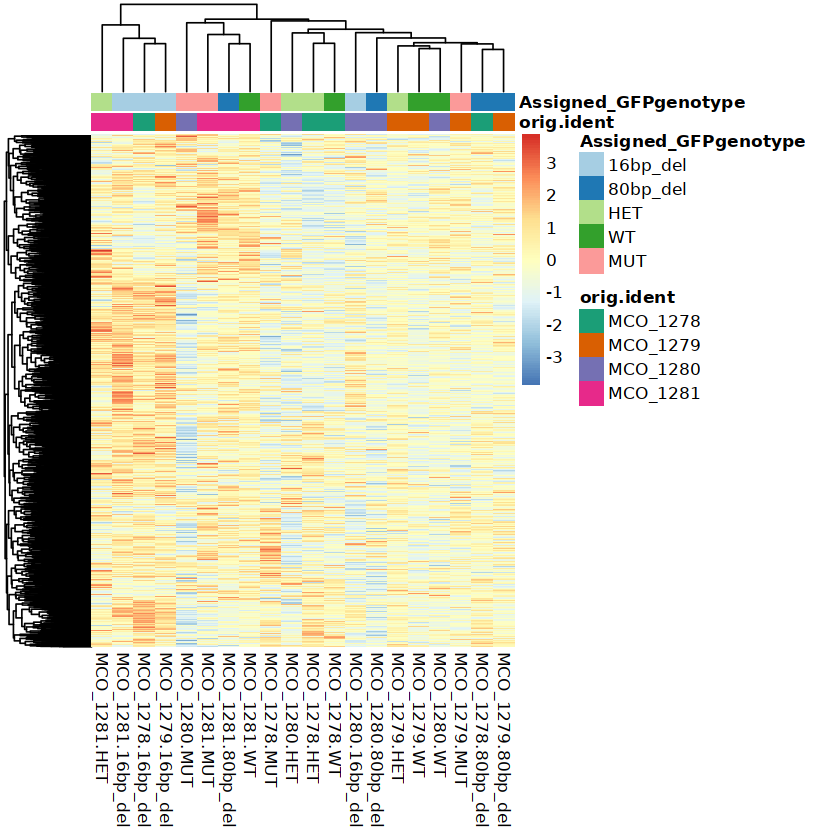

In [98]:
#### Peaks with CUX1 motif 

#options(repr.plot.width=10, repr.plot.height=6)
pheatmap (avg_cux1,cluster_rows = T, cluster_cols = T,
          show_rownames = F,
          annotation_colors = colsamp,
          scale="row", annotation_col = sanno)

In [92]:
avg_cux1_linked = subset(avg_cux1, rownames(avg_cux1) %in% lf$peak)

In [93]:
dim(avg_cux1_linked)

[1] 65 20

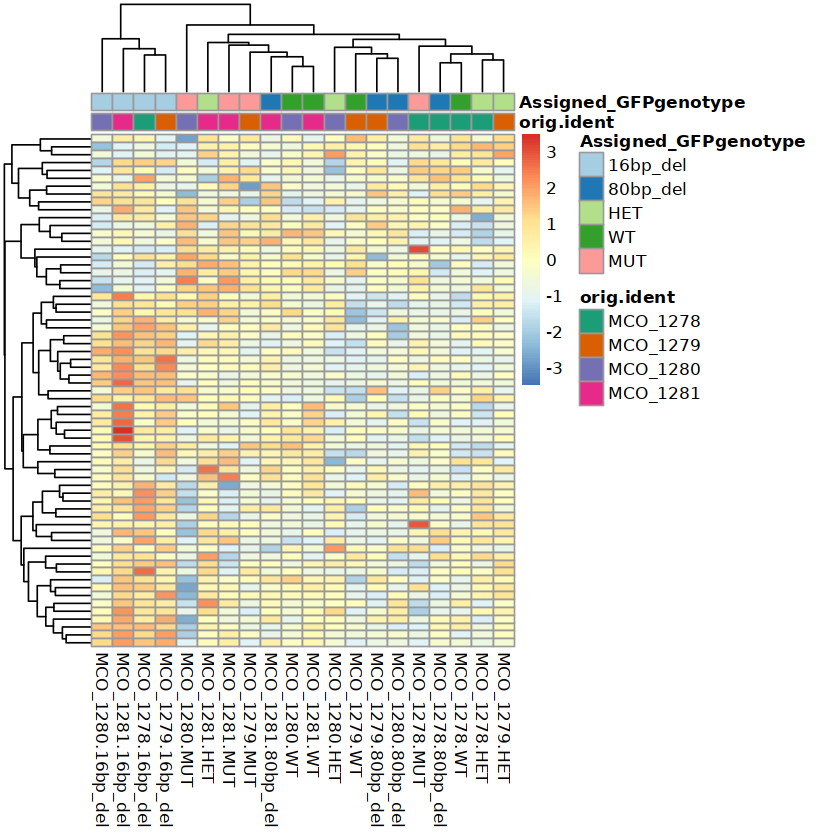

In [94]:
#### Peaks with CUX1 motif and linked to CUX1 target
pheatmap (avg_cux1_linked,cluster_rows = T, cluster_cols = T,
          show_rownames = F,
          annotation_colors = colsamp,
          scale="row", annotation_col = sanno) 

In [96]:
avg_cux1_da = subset(avg_cux1, rownames(avg_cux1) %in% c(top.da.peak_up,top.da.peak_down))
dim(avg_cux1_da)

[1] 94 20

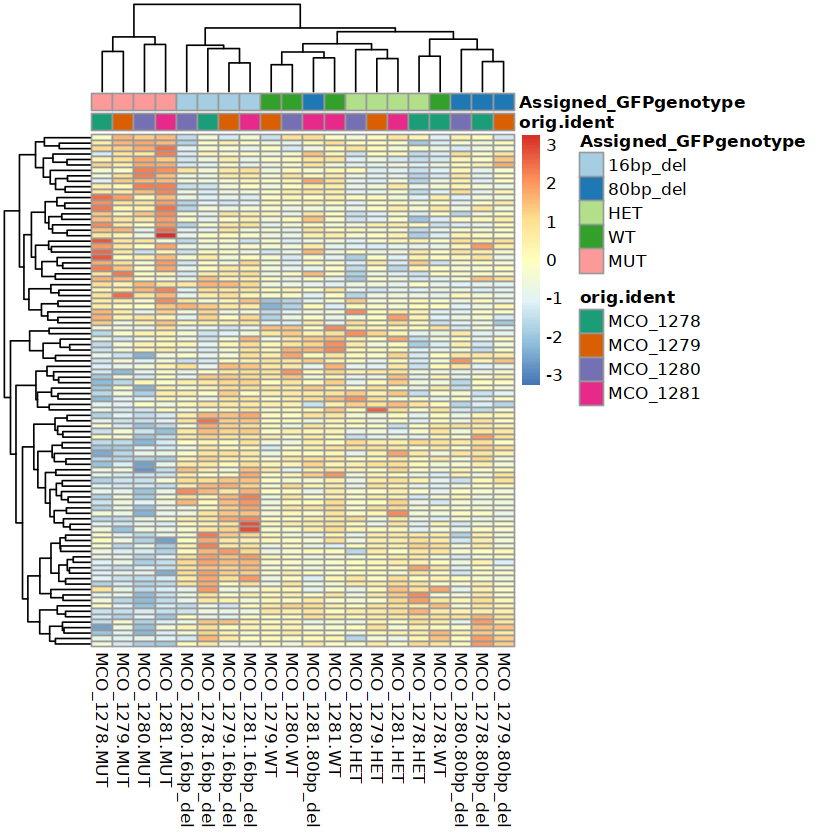

In [97]:
#### Peaks with CUX1 motif and differentially accessible between WT and MUT

pheatmap (avg_cux1_da,cluster_rows = T, cluster_cols = T,
          show_rownames = F,
          annotation_colors = colsamp,
          scale="row", annotation_col = sanno) 

### ChromVAR Analysis

In [ ]:
#### long step
DefaultAssay(adata) <- 'ATAC'
adata_new <- RunChromVAR(
  object = adata,
  genome = BSgenome.Hsapiens.UCSC.hg38
)

Computing GC bias per region



In [40]:
adata_new

An object of class Seurat 
459843 features across 11250 samples within 5 assays 
Active assay: ATAC (356772 features, 356772 variable features)
 2 layers present: counts, data
 4 other assays present: RNA, RNA_raw, SCT, chromvar
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [43]:
devscores = GetAssayData(adata_new,slot='data', assay="chromvar")

In [45]:
getwd()

[1] "/home/paola.benaglio/notebooks"

In [46]:
write.table(devscores, file=file.path(output_dir,'chromVAR_dev_scores_j2020.txt'), sep='\t', quote=FALSE)

In [47]:
Idents(adata_new)<- "new_categ"
differential.activity <- FindAllMarkers(assay = "chromvar", object = adata_new )

Calculating cluster MCO_1278.16bp_del

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster MCO_1278.80bp_del

Calculating cluster MCO_1278.HET

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster MCO_1278.WT

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster MCO_1278.MUT

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster MCO_1279.80bp_del

Calculating cluster MCO_1279.16bp_del

Calculating cluster MCO_1279.HET

Calculating cluster MCO_1279.MUT

Calculating cluster MCO_1279.WT

Calculating cluster MCO_1280.80bp_del

Calculating cluster MCO_1280.WT

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster MCO_1280.HET

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 

In [48]:
differential.activity = subset(differential.activity, avg_log2FC>0 & p_val_adj <0.05)

In [49]:
head(differential.activity )

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
PITX2        5.518437e-109 2.7004612  0.711 0.417 4.116754e-106
NR2F1        2.328199e-107 2.4293083  0.686 0.406 1.736837e-104
ZNF135       2.206418e-106 1.9470207  0.702 0.413 1.645988e-103
Nr2f6(var.2) 1.577115e-105 2.2728424  0.684 0.401 1.176528e-102
GFI1          1.956849e-83 0.5770551  0.716 0.453  1.459809e-80
ZNF460        2.077157e-78 2.0798127  0.664 0.426  1.549559e-75
             cluster           gene        
PITX2        MCO_1278.16bp_del PITX2       
NR2F1        MCO_1278.16bp_del NR2F1       
ZNF135       MCO_1278.16bp_del ZNF135      
Nr2f6(var.2) MCO_1278.16bp_del Nr2f6(var.2)
GFI1         MCO_1278.16bp_del GFI1        
ZNF460       MCO_1278.16bp_del ZNF460

In [50]:
sum(!duplicated(differential.activity$gene))

[1] 664

In [57]:
mat = sapply(levels(as.factor(adata_new$new_categ)),
                function(i) rowMeans(as.data.frame(devscores[unique(differential.activity$gene),adata_new$new_categ==i])))

In [58]:
head(mat)

MCO_1278.16bp_del MCO_1278.80bp_del MCO_1278.HET MCO_1278.MUT
PITX2        0.9590007         -0.05037073       -0.20762779   0.01598265 
NR2F1        0.7682629          0.06524419       -0.36065648   0.07434648 
ZNF135       0.7913278          0.06065451       -0.13449448  -0.01948899 
Nr2f6(var.2) 0.7794624         -0.02418774       -0.38316992  -0.06410160 
GFI1         1.0822892         -0.28750113        0.81262984  -0.34627296 
ZNF460       0.4848807          0.03497003       -0.07901816  -0.07664191 
             MCO_1278.WT MCO_1279.16bp_del MCO_1279.80bp_del MCO_1279.HET
PITX2        -0.07602059 0.6722970         -0.2743920        -0.4464266  
NR2F1        -0.21543106 0.6177427         -0.1478300        -0.4297598  
ZNF135       -0.06061172 0.5110768         -0.1669310        -0.2966771  
Nr2f6(var.2) -0.24079587 0.7124746         -0.2113810        -0.4893759  
GFI1          0.14596991 0.6432098         -0.8484387         0.4236518  
ZNF460       -0.04937412 0.3270201         -0.1461591        -0.1441536  
             MCO_1279.MUT MCO_1279.WT MCO_1280.16bp_del MCO_1280.80bp_del
PITX2        -0.3451654   -0.4254667  0.3447579445      -0.3739320       
NR2F1        -0.3274455   -0.4543137  0.2509180579      -0.2928254       
ZNF135       -0.2492571   -0.3577146  0.1421418588      -0.3600763       
Nr2f6(var.2) -0.3316320   -0.4126200  0.2562774797      -0.2439047       
GFI1         -0.6427956   -0.2485303  0.2271447754      -1.0891770       
ZNF460       -0.1773194   -0.2446382  0.0007691529      -0.2460767       
             MCO_1280.HET MCO_1280.MUT MCO_1280.WT MCO_1281.16bp_del
PITX2        -0.5224627   -0.3288790   -0.5320984   0.23044542      
NR2F1        -0.5216230   -0.4251540   -0.5641053   0.21766413      
ZNF135       -0.4774929   -0.4267260   -0.5685940   0.07643887      
Nr2f6(var.2) -0.5773141   -0.3908411   -0.5269027   0.18308882      
GFI1          0.1710365   -0.7683523   -0.3354674   0.77771629      
ZNF460       -0.3283228   -0.2933622   -0.3607044  -0.03381129      
             MCO_1281.80bp_del MCO_1281.HET MCO_1281.MUT MCO_1281.WT
PITX2        -0.4888901        -0.7512319   -0.3497741   -0.5013736 
NR2F1        -0.2666339        -0.7057503   -0.5481101   -0.5507275 
ZNF135       -0.3820985        -0.5529740   -0.4305878   -0.5040167 
Nr2f6(var.2) -0.4066060        -0.6387661   -0.5047592   -0.4982236 
GFI1         -1.0394052         0.6704402   -0.8134358   -0.3410162 
ZNF460       -0.2457562        -0.3371391   -0.2735122   -0.2738616

In [60]:
norm = t(apply(mat, 1, function(x) (x-min(x)) / (max(x) -min(x))))

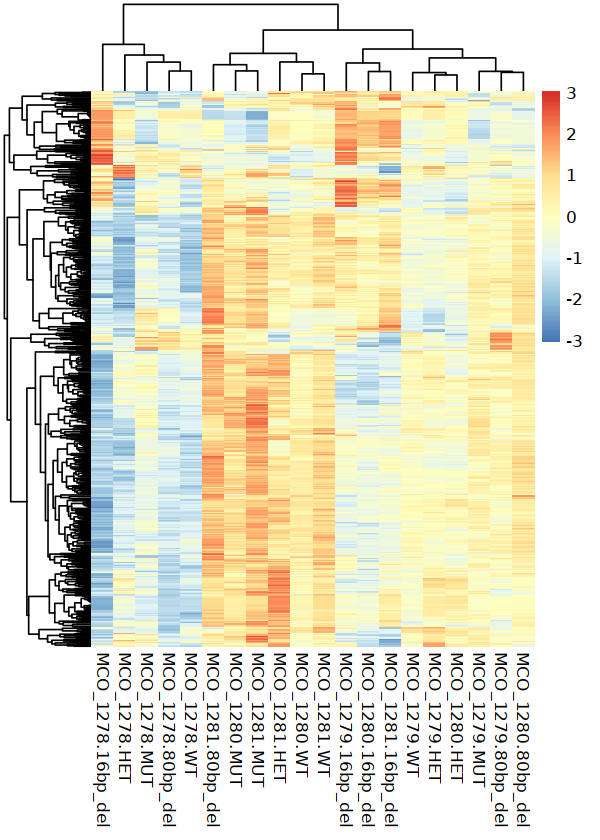

In [62]:
options(repr.plot.width=5, repr.plot.height=7)
pheatmap(mat, scale = "row",
        cluster_rows = T, cluster_cols = T,
         show_rownames = FALSE )

In [63]:
options(repr.plot.width=5, repr.plot.height=7)
pheatmap(norm,
        cluster_rows = T, cluster_cols = T,
         show_rownames = FALSE )

In [86]:
options(repr.plot.width=10, repr.plot.height=6)
pheatmap (mat[c("CUX1",'PITX2'),],cluster_rows = F, cluster_cols = F,scale="row", annotation_col = sanno)

In [ ]:
#### Linking peaks to genes

In [6]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/paola.benaglio/conda_envs/renv_multiome/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Rome
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12                   BSgenome.Hsapiens.UCSC.hg38_1.4.5
 [3] BSgenome_1.70.1                   rtracklayer_1.62.0               
 [5] BiocIO_1.12.0                     Biostrings_2.70.1    

In [9]:
BiocManager::install(c( 'terra', 'ggrastr') , lib ="/group/soranzo/paola.benaglio/r_libraries")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggrastr'”
Installing package(s) 'terra'

Warning message in install.packages(...):
“installation of package ‘terra’ had non-zero exit status”
Old packages: 'biomaRt', 'Biostrings', 'BSgenome', 'bslib', 'callr',
  'commonmark', 'cowplot', 'curl', 'data.table', 'deldir', 'digest', 'future',
  'GenomicFeatures', 'ggplot2', 'ggridges', 'ggsci', 'gplots', 'htmltools',
  'httpuv', 'igraph', 'pkgbuild', 'processx', 'ps', 'ragg', 'RcppAnnoy',
  'RcppArmadillo', 'RcppEigen', 'RcppHNSW', 'remotes', 'reticulate', 'Rhtslib',
  'rmarkdown', 'RSQLite', 'rstudioapi', 'sass', 'Seurat', 'shiny', 'sp',
  'spatstat.e

In [5]:
.libPaths(new = c("/home/paola.benaglio/conda_envs/renv_multiome/lib/R/library",
          "/group/soranzo/paola.benaglio/r_libraries"))

In [7]:
devtools::install_github('cole-trapnell-lab/monocle3', lib ="/group/soranzo/paola.benaglio/r_libraries")

units (NA -> 0.8-5 ) [CRAN]
sf    (NA -> 1.0-16) [CRAN]
spdep (NA -> 1.3-3 ) [CRAN]


Installing 3 packages: units, sf, spdep

Warning message in i.p(...):
“installation of package ‘units’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘sf’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘spdep’ had non-zero exit status”


── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/localscratch/9791289.paola.benaglio/RtmpoQug4K/remotes1d868a427d8eea/cole-trapnell-lab-monocle3-1336cc9/DESCRIPTION’ (1.3s)
─  preparing ‘monocle3’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘monocle3_1.3.6.tar.gz’
   


Warning message in i.p(...):
“installation of package ‘/localscratch/9791289.paola.benaglio/RtmpoQug4K/file1d868a33c4e4df/monocle3_1.3.6.tar.gz’ had non-zero exit status”


In [2]:
library(monocle3)

ERROR: Error in library(monocle3): there is no package called ‘monocle3’


In [4]:
library(ggrastr)